In [1]:
#Let's start with a circles problem

from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 2000, noise = 0.03, random_state = 101)


In [2]:
X.size

4000

In [3]:
y.size

2000

In [4]:
X

array([[-0.73741517,  0.16318233],
       [ 0.32741476,  0.96171879],
       [-0.13641828,  0.75328377],
       ...,
       [-0.48372559,  0.62959841],
       [-0.80369748, -0.24834989],
       [ 0.6925668 , -0.74345544]])

In [5]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [4]:
#Let's visualise the data. But for that we need to model the data in a dataframe.

import matplotlib.pyplot as plt
import pandas as pd

circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'y':y})
circles

,X0,X1,y
0,-0.737415,0.163182,1
1,0.327415,0.961719,0
2,-0.136418,0.753284,1
3,0.027356,0.772695,1
4,-0.039089,0.758986,1
...,...,...,...
1995,-0.715750,-0.520338,1
1996,0.528959,-0.606976,1
1997,-0.483726,0.629598,1
1998,-0.803697,-0.248350,1


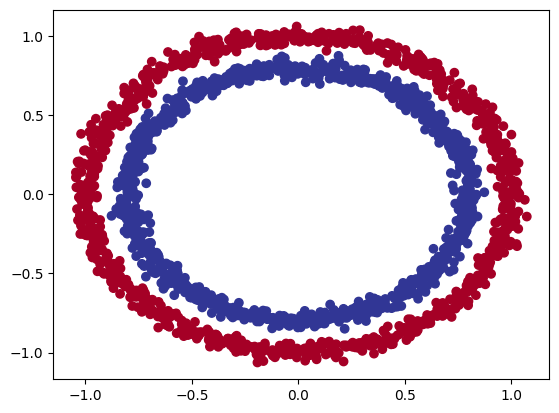

In [5]:
plt.scatter(circles['X0'],circles['X1'],c=y,cmap=plt.cm.RdYlBu);

In [6]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [9]:
#model 1

#Create model

tf.random.set_seed(101)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[2])
])

#Compile model
model_1.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])


In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#Fit model
model_1.fit(X,y,epochs=5)

Epoch 1/5
63/63 [==============================] - 1s 2ms/step - loss: 6.0929 - accuracy: 0.4840
Epoch 2/5
63/63 [==============================] - 0s 1ms/step - loss: 4.9772 - accuracy: 0.4745
Epoch 3/5
63/63 [==============================] - 0s 2ms/step - loss: 2.3482 - accuracy: 0.4790
Epoch 4/5
63/63 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.4940
Epoch 5/5
63/63 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4950


In [12]:
model_1.evaluate(X,y)

63/63 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4950


[0.6937577724456787, 0.4950000047683716]

In [13]:
"""
Ways to improve the model:
1. Create step: add more layers and neurons. Add activation functions.
2. Compile step: add learning rate, change optimizer to Adam
3. Fit step: add more epochs
"""

'\nWays to improve the model:\n1. Create step: add more layers and neurons. Add activation functions.\n2. Compile step: add learning rate, change optimizer to Adam\n3. Fit step: add more epochs\n'

In [14]:
#Model 2 - Add another layer with 10 neurons. Increase epochs to 100.

#Create model

tf.random.set_seed(101)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[2]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile model
model_2.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
#Fit model
model_2.fit(X,y,epochs=100,verbose=False)

In [17]:
model_2.evaluate(X,y)

63/63 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6937423944473267, 0.5]

In [13]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


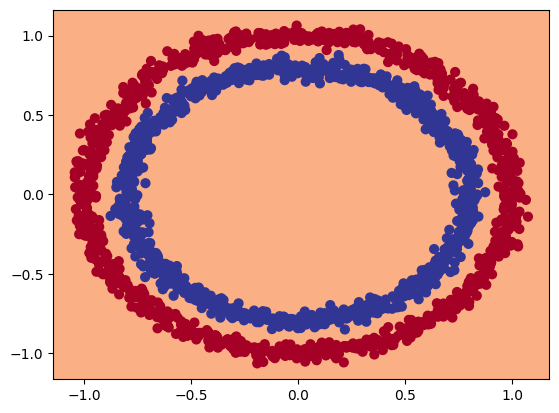

In [19]:
#plot the decision boundary our model is producing

plot_decision_boundary(model=model_2,
                               X = X,
                               y = y)

In [20]:
#Trying a regression problem with the decision boundary

tf.random.set_seed(107)

#Generate dataset
X_reg = tf.range(0,100,5)
y_reg = X_reg + 10

X_reg = X_reg.numpy()
y_reg = y_reg.numpy()

X_reg, y_reg

(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95], dtype=int32),
 array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
         75,  80,  85,  90,  95, 100, 105], dtype=int32))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_reg_train, X_reg_test,y_reg_train,y_reg_test = train_test_split(X_reg,y_reg,test_size=0.2,random_state=107)

In [23]:
#Create model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile model
model_3.compile(optimizer = tf.keras.optimizers.Adam(),
                 loss = tf.keras.losses.MeanAbsoluteError(),
                 metrics = ["mae"])

In [24]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               200       
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1221 (4.77 KB)
Trainable params: 1221 (4.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model_3.fit(X_reg_train,y_reg_train,epochs=100,verbose=False)

In [26]:
model_3.evaluate(X_reg_test,y_reg_test)

1/1 [==============================] - 0s 447ms/step - loss: 3.0004 - mae: 3.0004


[3.000403881072998, 3.000403881072998]

In [27]:
y_reg_pred = model_3.predict(X_reg_test)
y_reg_pred

1/1 [==============================] - 0s 268ms/step


array([[74.2452  ],
       [57.393665],
       [96.71392 ],
       [18.073423]], dtype=float32)

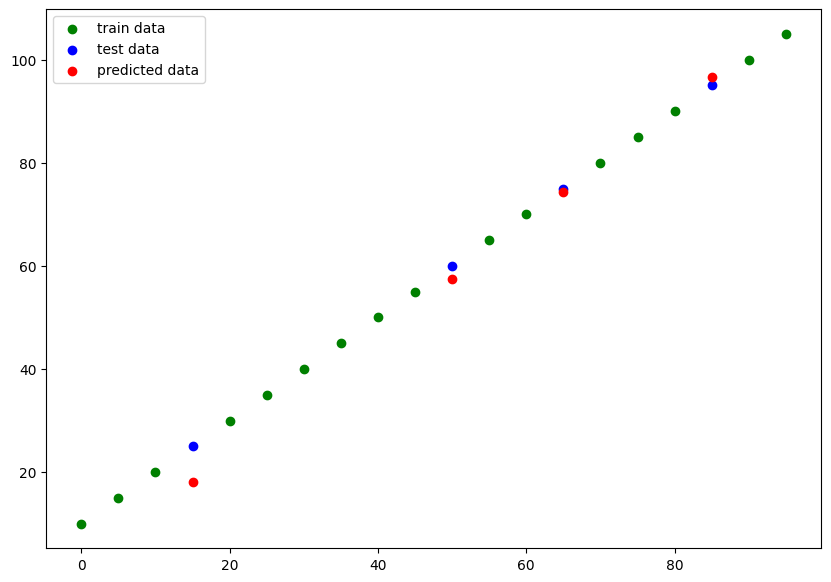

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='g',label='train data')
plt.scatter(X_reg_test,y_reg_test,c='b',label='test data')
plt.scatter(X_reg_test,y_reg_pred,c='r',label='predicted data')

plt.legend();

In [29]:
#Model with more layers, more neurons AND an activation function for input and output layers

#Create model
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu",input_shape=[2]),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile model
model_4.compile(
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"]
              )

#Fit model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
63/63 [==============================] - 2s 6ms/step - loss: 0.7052 - accuracy: 0.4880
Epoch 2/100
63/63 [==============================] - 0s 6ms/step - loss: 0.6993 - accuracy: 0.4715
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.4740
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.4750
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4760
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.4825
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5020
Epoch 8/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5075
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5125
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5195
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


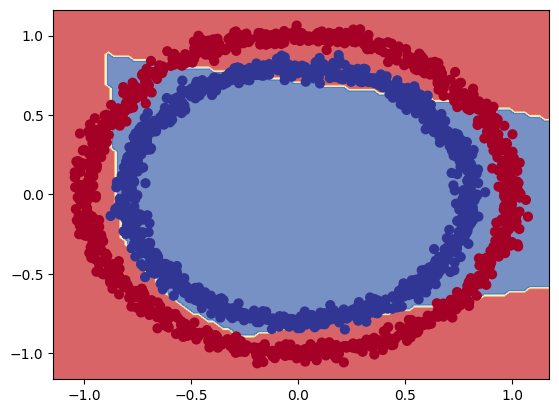

In [30]:
#Let's visualize

plot_decision_boundary(model_4,X,y)

In [31]:
#Create a model

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=[2],activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile model

model_5.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01),
                loss = tf.keras.losses.MeanAbsoluteError(),
                metrics = ["accuracy"])

#Fit model
history = model_5.fit(X,y,epochs=50)

Epoch 1/50
63/63 [==============================] - 1s 3ms/step - loss: 0.4976 - accuracy: 0.5030
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.5025
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.5085
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.5035
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.5010
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.4995
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.5025
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.5070
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.5090
Epoch 11/50
63/63 [

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


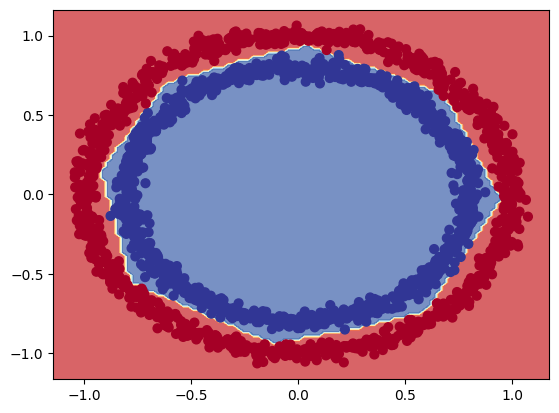

In [32]:
plot_decision_boundary(model_5,X,y)

In [7]:
#Prepare train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 2), (400, 2), (1600,), (400,))

In [10]:

tf.random.set_seed(42)
#Create a model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=[2],activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile model

model_6.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])

#Fit model
history = model_6.fit(X_train,y_train,epochs=25, verbose = False)

In [11]:
model_6.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9950


[0.054570186883211136, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


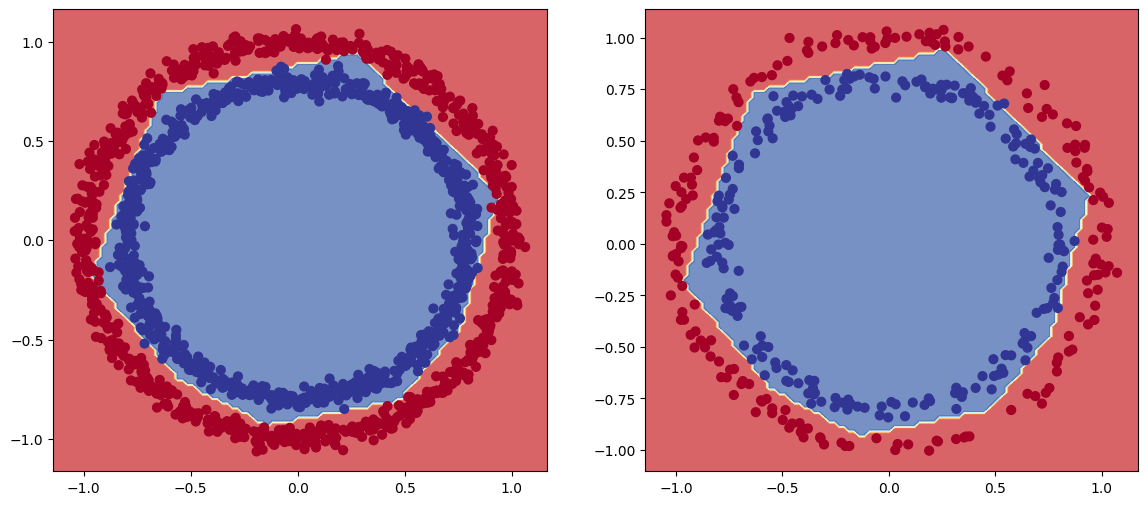

In [14]:
#Plot our model outcomes

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_6,X_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_6,X_test,y_test)
plt.show();

<Axes: >

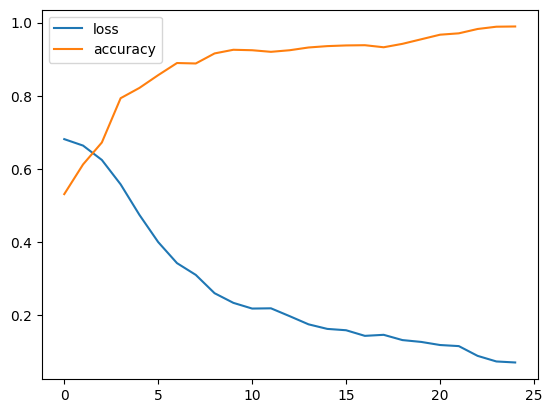

In [15]:
#Plot accuracy, loss curve

pd.DataFrame(history.history).plot()

In [20]:
from sklearn.metrics import confusion_matrix

y_pred = model_6.predict(X_test)
confusion_matrix(y_test,tf.round(y_pred))

13/13 [==============================] - 0s 2ms/step


array([[189,   0],
       [  2, 209]])

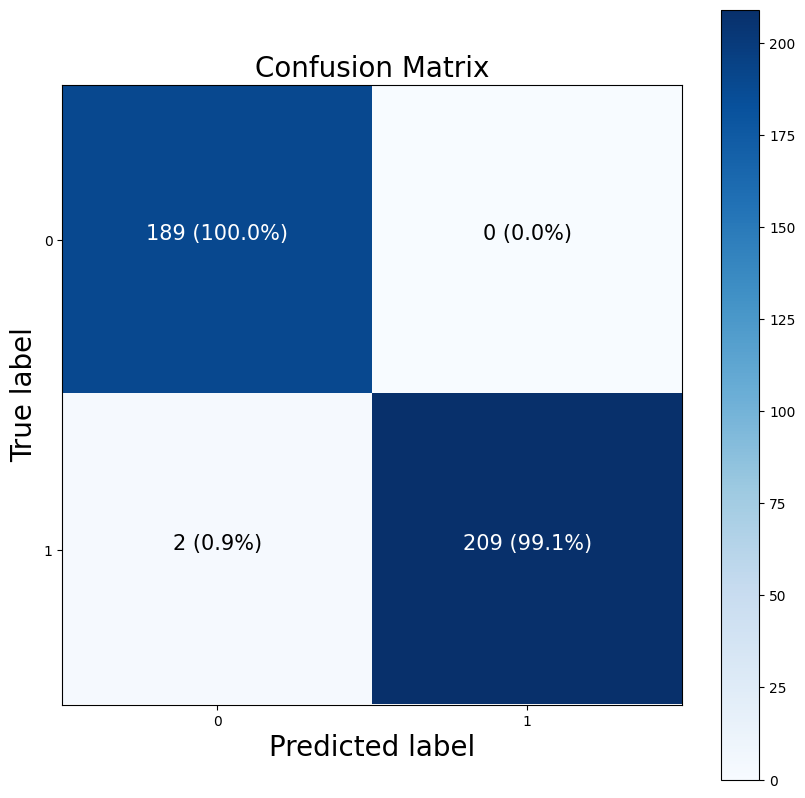

In [21]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [29]:
#Multi-class classification

import tensorflow as tf
import tensorflow_datasets as tfds

In [30]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [31]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [32]:
x_train[11], y_train[11]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  39, 111,  93,  85,  27,   0,   0,   0,   0,   0,   1,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0, 190, 244, 248, 255, 255, 155, 202, 212, 150,   9,   0,   3,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
           0, 213, 227, 233, 227, 243, 246, 255, 250, 255, 146,   0,   9,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
           6, 244, 233, 236, 244, 232, 214, 248, 242, 251,  33,   0,   7,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   6,   0,
          72, 255, 231, 239, 244, 237, 226, 255, 252, 207,  44,  24,   0,
           2,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         125, 231, 215, 253, 252, 234, 246, 254, 239, 128, 114,  63,   0,
           3

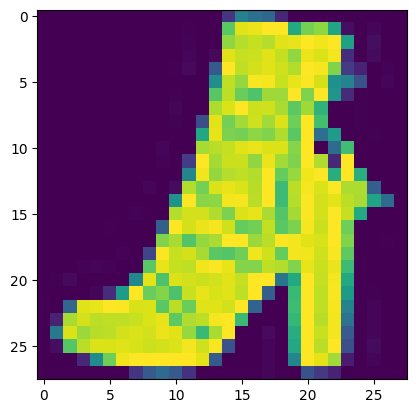

In [35]:
import matplotlib.pyplot as plt

plt.imshow(x_train[11])

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

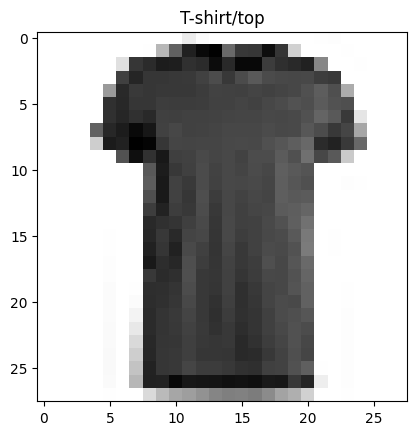

In [37]:
index_of_choice = 17

plt.imshow(x_train[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[y_train[index_of_choice]])

In [19]:
tf.random.set_seed(7)

#Build a multi-class classification model

model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])

#Compile model

model_7.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ["accuracy"])

#Fit the model
non_norm_history = model_7.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3968 - accuracy: 0.0994 - val_loss: 2.3062 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3029 - accuracy: 0.0971 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.0995 - val_loss: 2.3042 - val_accuracy: 0.1001
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3051 - accuracy: 0.0993 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3042 - val_accuracy:

In [17]:
model_7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
x_train.min(), x_train.max()

(0, 255)

In [39]:
x_train_norm = x_train/255.0

x_test_norm = x_test/255.0

In [42]:
x_train_norm.min(),x_train_norm.max()

(0.0, 1.0)

In [46]:
tf.random.set_seed(7)

#Build a multi-class classification model

model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])

#Compile model

model_7.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ["accuracy"])

#Fit the model
norm_history = model_7.fit(x_train_norm,y_train,epochs=10,validation_data=(x_test_norm,y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0058 - accuracy: 0.6379 - val_loss: 0.7574 - val_accuracy: 0.7121
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6373 - accuracy: 0.7742 - val_loss: 0.6274 - val_accuracy: 0.7803
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5954 - accuracy: 0.7882 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5724 - accuracy: 0.7947 - val_loss: 0.6228 - val_accuracy: 0.7809
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5601 - accuracy: 0.7999 - val_loss: 0.5990 - val_accuracy: 0.7953
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5515 - accuracy: 0.8028 - val_loss: 0.5941 - val_accuracy: 0.7922
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5432 - accuracy: 0.8055 - val_loss: 0.5726 - val_accuracy:

<Axes: title={'center': 'Normalized Data'}>

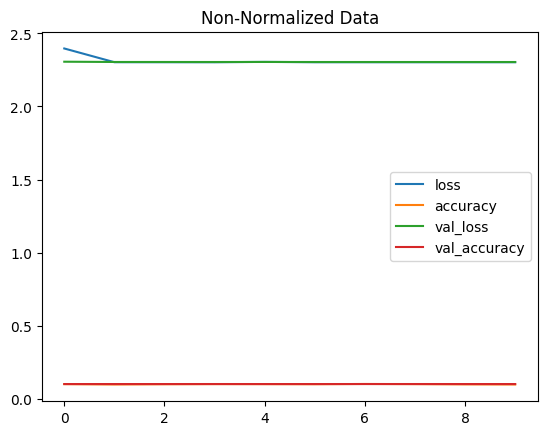

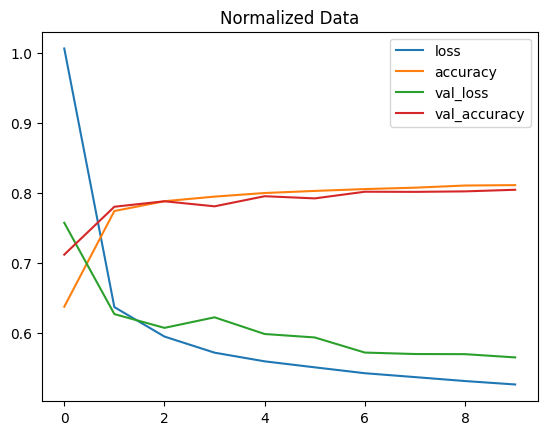

In [49]:
import pandas as pd


pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

In [50]:
tf.random.set_seed(7)

#Build a multi-class classification model

model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])

#Compile model

model_8.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ["accuracy"])

#Fit the model
norm_history_2 = model_8.fit(x_train_norm,y_train,epochs=20,validation_data=(x_test_norm,y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.7653 - accuracy: 0.2842 - val_loss: 1.3891 - val_accuracy: 0.4401
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3169 - accuracy: 0.4496 - val_loss: 1.1641 - val_accuracy: 0.5516
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9626 - accuracy: 0.6558 - val_loss: 0.8756 - val_accuracy: 0.7113
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7970 - accuracy: 0.7364 - val_loss: 0.7692 - val_accuracy: 0.7436
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7189 - accuracy: 0.7555 - val_loss: 0.7235 - val_accuracy: 0.7481
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6831 - accuracy: 0.7621 - val_loss: 0.7114 - val_accuracy: 0.7501
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6638 - accuracy: 0.7649 - val_loss: 0.6950 - val_accuracy:

In [51]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [53]:
y_probs = model_7.predict(x_test_norm)

y_probs

313/313 [==============================] - 1s 3ms/step


array([[6.7192102e-10, 3.3376459e-06, 7.5577861e-07, ..., 9.7673558e-02,
        2.7071335e-04, 8.5745889e-01],
       [3.3973982e-05, 1.7277933e-11, 9.7072858e-01, ..., 0.0000000e+00,
        1.8719144e-03, 4.2800166e-23],
       [4.8737024e-06, 9.9917287e-01, 2.6355153e-07, ..., 3.1781968e-25,
        1.6268244e-11, 1.1800677e-07],
       ...,
       [3.3714324e-01, 2.6178060e-03, 9.3684718e-02, ..., 3.3886423e-09,
        6.6010945e-02, 3.2654348e-06],
       [3.2461337e-06, 9.9251634e-01, 4.1854111e-07, ..., 2.4678145e-19,
        7.6505435e-10, 1.2879440e-03],
       [3.1208725e-07, 2.4465264e-05, 4.4751530e-05, ..., 9.4831489e-02,
        3.6916023e-03, 4.6203616e-03]], dtype=float32)

In [58]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [60]:
y_pred = y_probs.argmax(axis=1)

y_pred

array([9, 2, 1, ..., 6, 1, 5])

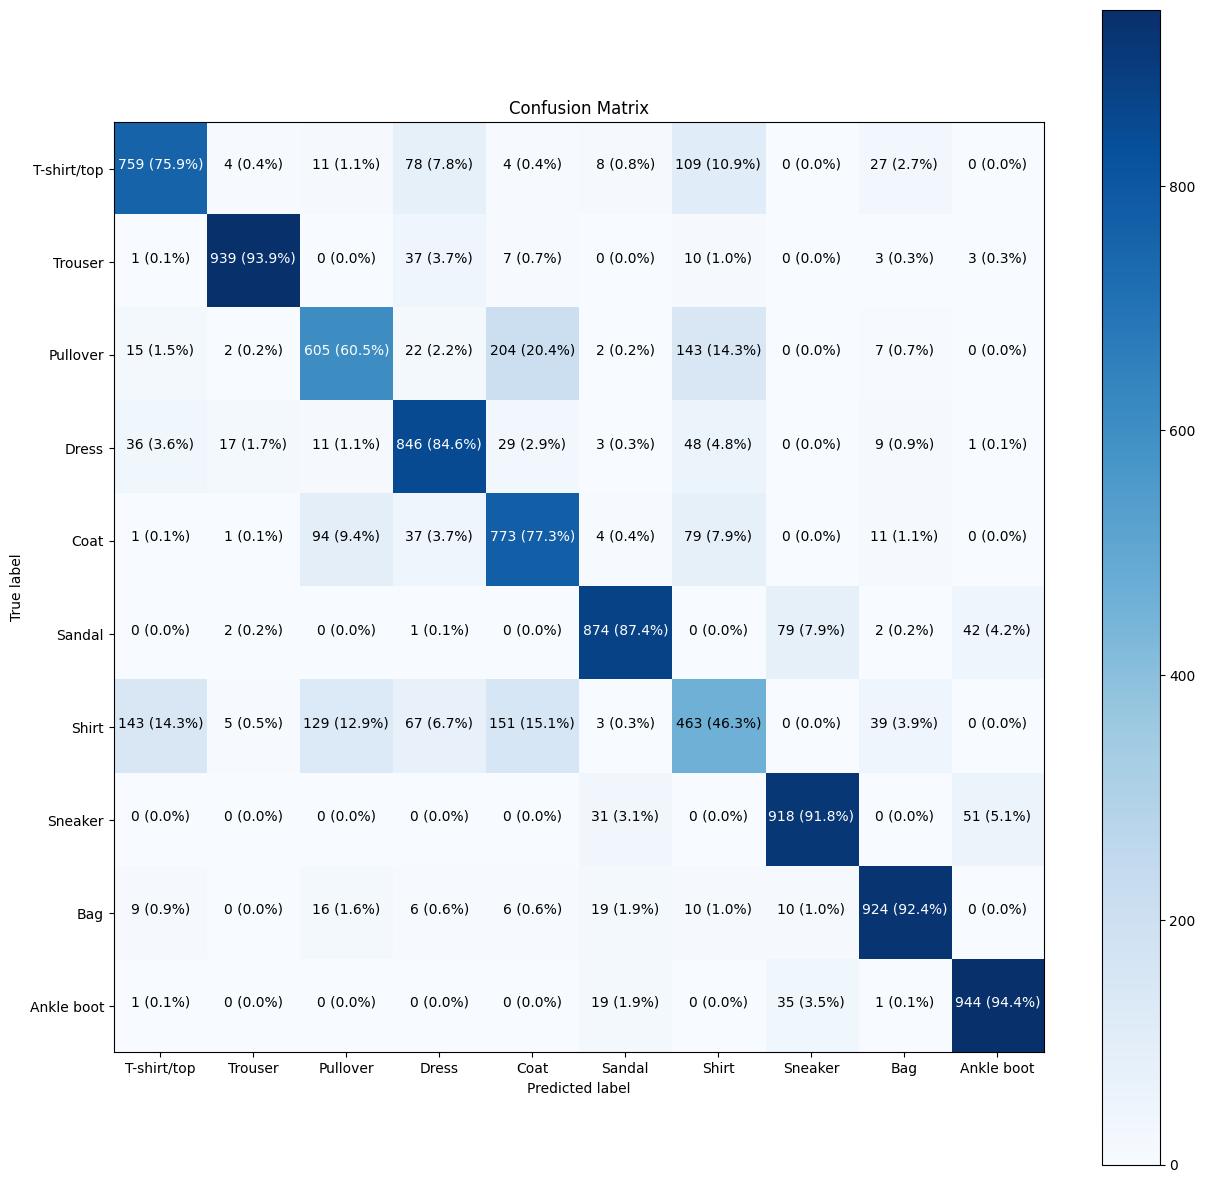

In [65]:
import numpy as np
make_confusion_matrix(y_true = y_test, y_pred = y_pred, classes=class_names, figsize=(15, 15), text_size=10)

In [66]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red


1/1 [==============================] - 0s 21ms/step


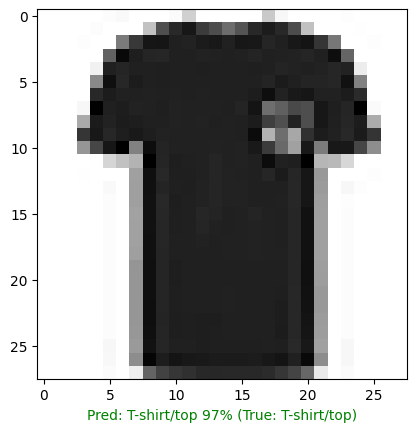

In [73]:

# Check out a random image as well as its prediction
plot_random_image(model=model_7,
                  images=x_test_norm,
                  true_labels=y_test,
                  classes=class_names)